<a href="https://colab.research.google.com/github/rhayssacorreaa/rhayssacorreaa/blob/main/titanicanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


📚 Importing the required libraries

In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8, 5


🎲 Importing the data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic/titanic.csv')



Looking at its structure

In [5]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


note: "Age", "Cabin" and "Embarked" are missing data

In [7]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print('Dataset size:', df.shape)


Dataset size: (891, 12)


Data dictionary:

Survived: 0 = No, 1 = Yes

Pclass: Entry class 1 = 1st, 2 = 2nd, 3 = 3rd

Sex: Sex of the passenger

Age: Age in years

Sibsp: Number of siblings/spouses on board the Titanic

Parch: Number of parents / children on board the Titanic

Ticket: Boarding pass number

Fare: Fare paid by the Passenger

Cabin: Cabin number

Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

Data Cleaning


In [9]:
print(df[df['Age'].isnull()].shape)
print(df[df['Cabin'].isnull()].shape)
print(df[df['Embarked'].isnull()].shape)

(177, 12)
(687, 12)
(2, 12)


In [12]:
df.drop('Cabin', axis = 1, inplace = True) #excluding the cabin column
#I'm excluding the cabin column because it has more than 75 per cent missing data and filling in this missing data wouldn't be feasible and could get in the way of classification
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: xlabel='Pclass', ylabel='Age'>

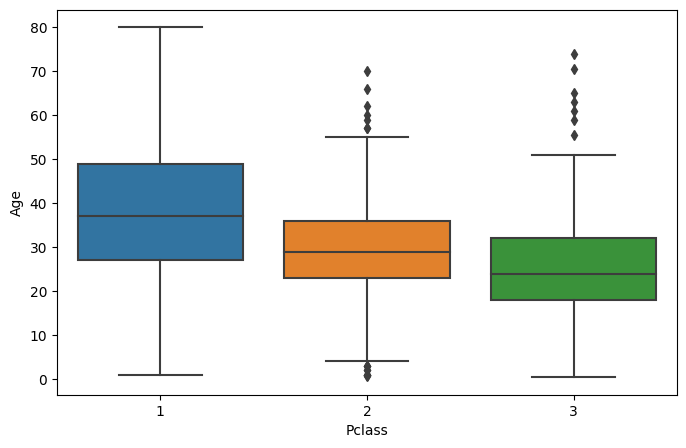

In [13]:
sns.boxplot(data = df, x = 'Pclass', y = 'Age') #replacing null values in the Age column


The "Age" column uses a strategy of filling in the missing data with the median age for each of the accommodation classes of each passenger.

In [14]:
print('Median age of people in the first class:', df[df['Pclass'] == 1]['Age'].median())
print('Median age of people in the second class:', df[df['Pclass'] == 2]['Age'].median())
print('Median age of people in the third class:', df[df['Pclass'] == 3]['Age'].median())

Median age of people in the first class: 37.0
Median age of people in the second class: 29.0
Median age of people in the third class: 24.0


In [16]:
def age_inputs(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [17]:
df['Age'] = df[['Age','Pclass']].apply(age_inputs, axis = 1)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


With the "Age" column duly filled in, some strategy is still needed to resolve the missing data in the "Embarked" column

Removing the rows that have a null value in the "Embarked" column:

ps:for the "Embarked" column, it's more interesting to exclude the 2 missing pieces of data, as their exclusion doesn't have much influence on the behaviour of the rest of the dataset.

In [18]:
df.dropna(inplace=True)


🔎Análise Exploratória:

In [19]:
print('Survived:', df['Survived'].value_counts()[1])
print('Did not survive:', df['Survived'].value_counts()[0])

Survived: 340
Did not survive: 549


In [20]:
corr_matrix = df[['Survived', 'Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare',	'Embarked']].corr()


<ipython-input-20-ae3047c85302>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df[['Survived', 'Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare',	'Embarked']].corr()


<Axes: >

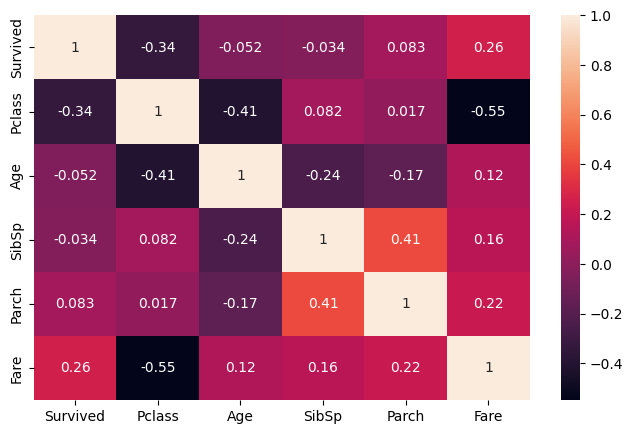

In [21]:
sns.heatmap(corr_matrix, annot=True)


Correlation between the variables in the data set.


<Axes: xlabel='Pclass', ylabel='Fare'>

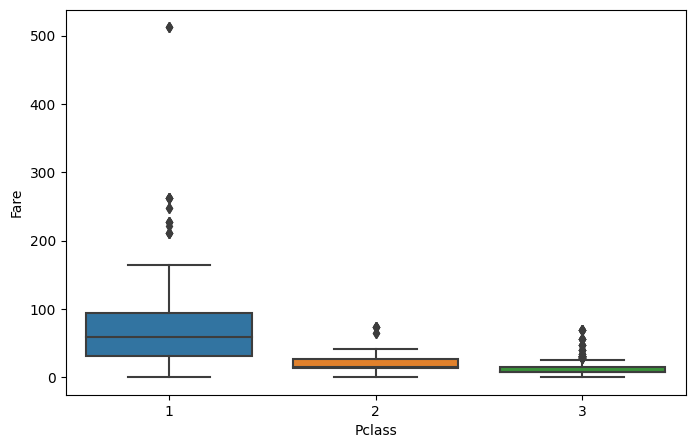

In [22]:
sns.boxplot(data = df, x = 'Pclass', y = 'Fare')


Distribution of fares between passenger accommodation classes.

In [23]:
np.where(df['Fare'] > 500)


(array([257, 678, 736]),)

note: the presence of outliers that are very different from the rest of the samples is noticeable. Where only 3 passengers paid a very high fare. More than 500 dollars at the time.

In [24]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.626168
1,2,0.472826
2,3,0.242363


note:the survival rate also shows that passengers with the best accommodation classes were more likely to survive than those with the worst accommodation classes.

<Axes: xlabel='Survived', ylabel='count'>

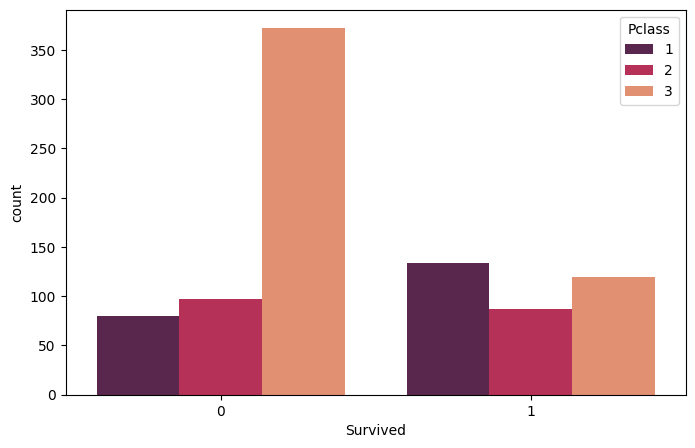

In [25]:
sns.countplot(data = df, x = 'Survived', hue= 'Pclass', palette = 'rocket')


It's clear from this graph that many more 3rd class people didn't survive.

In [26]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.740385
1,male,0.188908


note:the probability of survival if the individual were female is higher than if they were male.

<Axes: xlabel='Survived', ylabel='count'>

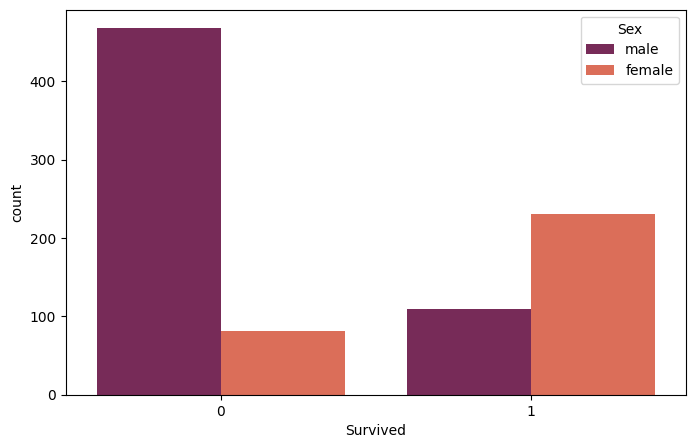

In [27]:
sns.countplot(data = df, x = 'Survived', hue= 'Sex', palette = 'rocket')


<Axes: xlabel='Survived', ylabel='count'>

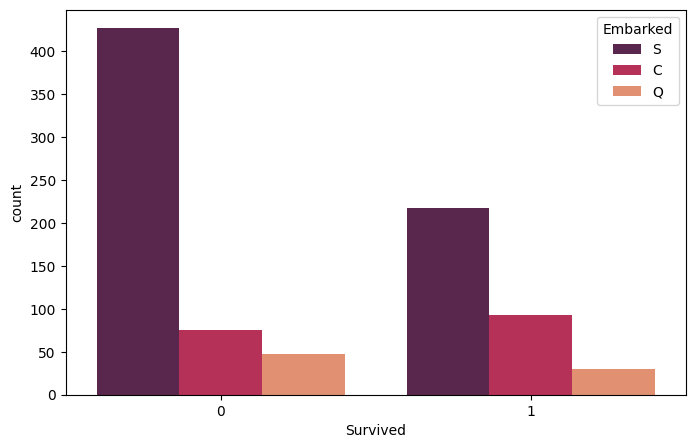

In [28]:
sns.countplot(data = df, x = 'Survived', hue= 'Embarked', palette = 'rocket')


This graph analyses the chance of survival according to the port of embarkation. It is much higher if the individual embarked in Cherbourg than in Queenstown or Southampton.

In [29]:
df['Embarked'].value_counts()



S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<ipython-input-31-f4bd79f7df04>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data = df, x = 'Age', palette = 'rocket', bins=30)


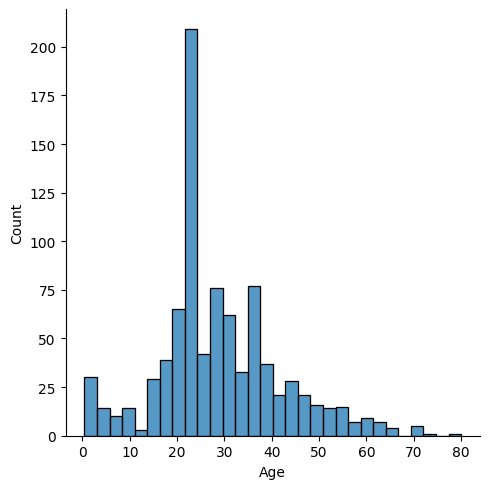

In [31]:
sns.displot(data = df, x = 'Age', palette = 'rocket', bins=30)


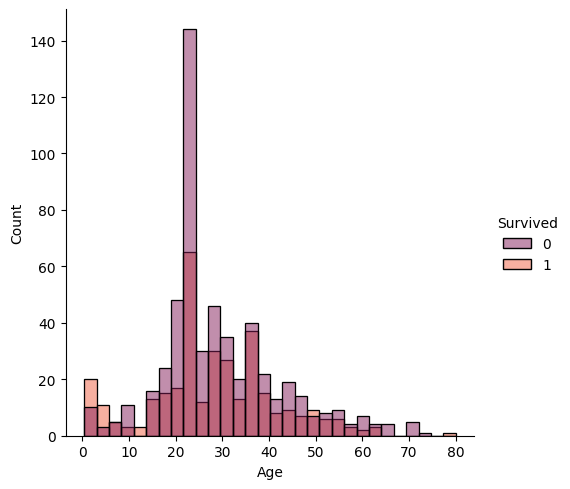

In [32]:
sns.displot(data = df, x = 'Age', palette = 'rocket', bins=30, hue= 'Survived')


note: superimposed graph of the distributions of those who died and those who lived.

In [33]:
features= ['Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare',	'Embarked', 'Survived']
df = df[features]


df.head()


,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked,Survived
0,3,22.0,male,1,0,7.2500,S,0
1,1,38.0,female,1,0,71.2833,C,1
2,3,26.0,female,0,0,7.9250,S,1
3,1,35.0,female,1,0,53.1000,S,1
4,3,35.0,male,0,0,8.0500,S,0


The "Name" and "Ticket" columns were removed because their information is not useful for classification, as they are unique to each individual. The "Cabin" column was also excluded due to the amount of missing data.

Treating categorical variables

In [34]:
df = pd.get_dummies(df, columns = ['Sex', 'Embarked'])


df.head()

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,1


Categorical variables need to be discretised to make sense for the model. To do this, new columns are created for each of the categorical classes and, using binary logic, the value of 0 or 1 of the data is assigned to the corresponding column.

🗂️ Defining the attribute matrix and the target vector:

In [35]:

X = df.drop(columns = 'Survived')
y = df['Survived']


✂️  Separating our dataset into a training set and a test set

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


Training...

In [37]:
clf = DecisionTreeClassifier().fit(X_train, y_train)


Analysing the model's Classification Report

In [38]:
y_pred = clf.predict(X_test)


In [39]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       141
           1       0.69      0.72      0.71        82

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



- Accuracy measures how many of the model's positive predictions are actually correct;

- Accuracy is a general evaluation measure that measures the proportion of - correct predictions;

- F1-Score is an evaluation measure that considers both precision and recall;

- Recall measures the model's ability to detect all positive examples.

Analysing the model's confusion matrix:

In [40]:

cf_matrix_nb = confusion_matrix(y_test, y_pred)
print(cf_matrix_nb)

[[115  26]
 [ 23  59]]


<Axes: >

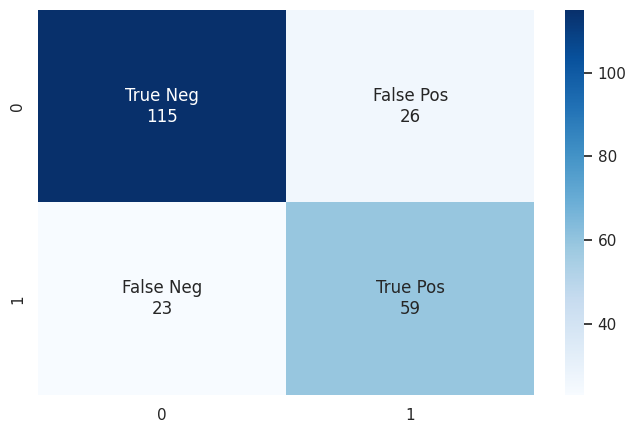

In [41]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_nb.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)

sns.set(font_scale= 1)
sns.heatmap(cf_matrix_nb, annot=labels, fmt= '', cmap='Blues')

In [42]:
X_train.head()


,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
376,3,22.0,0,0,7.2500,1,0,0,0,1
458,2,50.0,0,0,10.5000,1,0,0,0,1
732,2,29.0,0,0,0.0000,0,1,0,0,1
507,1,37.0,0,0,26.5500,0,1,0,0,1
830,3,15.0,1,0,14.4542,1,0,1,0,0


🌳 Visualising the tree that the model has built

In [43]:
clf_plot_tree = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)


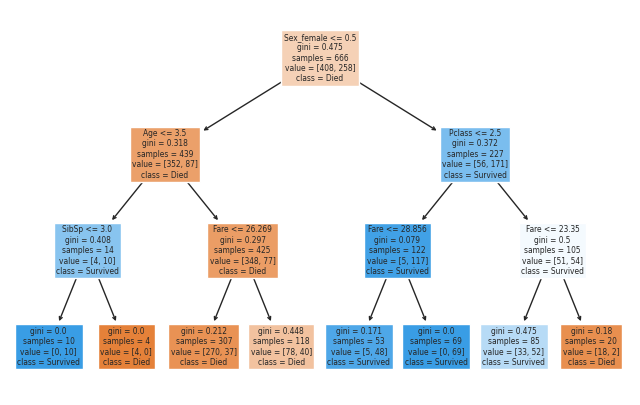

In [44]:

fn = ['Pclass',	'Age', 'SibSp',	'Parch', 'Fare',	'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q'	,'Embarked_S']
cn = ['Died', 'Survived']

plot_tree(clf_plot_tree,
            feature_names = fn,
            class_names=cn,
            filled = True);

Improving the model: fine tuning

There are countless hyperparameters that can be adjusted in models, and finding the optimal combination of them can be considered a search challenge. There are currently several optimisation algorithms available for this task, but one simple technique is GridSearch!

To adjust the hyperparameters in scikit-learn, you can use the GridSearchCV method, which efficiently finds the ideal hyperparameter values from among those provided.

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }


In [46]:
grid_search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [47]:
print('Best parameters found:\n', grid_search.best_params_)


Best parameters found:
 {'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}


In [48]:
clf_tuned = DecisionTreeClassifier(max_features = 'log2',
                            ccp_alpha = 0.001,
                            max_depth = 7,
                            criterion = 'entropy')


Training...

In [49]:
clf_tuned = clf_tuned.fit(X_train, y_train)


Analysing the model's Classification Report

In [50]:
y_pred_tuned = clf_tuned.predict(X_test)

class_report = classification_report(y_test, y_pred_tuned)
print(class_report)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       141
           1       0.76      0.66      0.71        82

    accuracy                           0.80       223
   macro avg       0.79      0.77      0.78       223
weighted avg       0.80      0.80      0.79       223



note: performance improves when the hyperparameters are altered.

Analysing the model's confusion matrix

In [51]:
cf_matrix_nb_tuned = confusion_matrix(y_test, y_pred_tuned)
print(cf_matrix_nb_tuned)

[[124  17]
 [ 28  54]]


<Axes: >

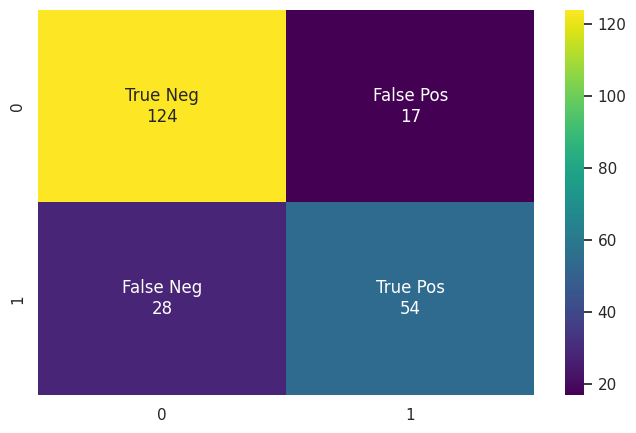

In [53]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_nb_tuned.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)

sns.set(font_scale= 1)
sns.heatmap(cf_matrix_nb_tuned, annot=labels, fmt= '', cmap='viridis')

🌳 Using Random Forest

In [54]:
rf = RandomForestClassifier().fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)


Analysing the model's Classification Report

In [55]:
class_report = classification_report(y_test, y_pred_rf)
print(class_report)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       141
           1       0.73      0.72      0.72        82

    accuracy                           0.80       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [59]:
cf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(cf_matrix_rf)

[[119  22]
 [ 23  59]]



Analysing the model's confusion matrix

<Axes: >

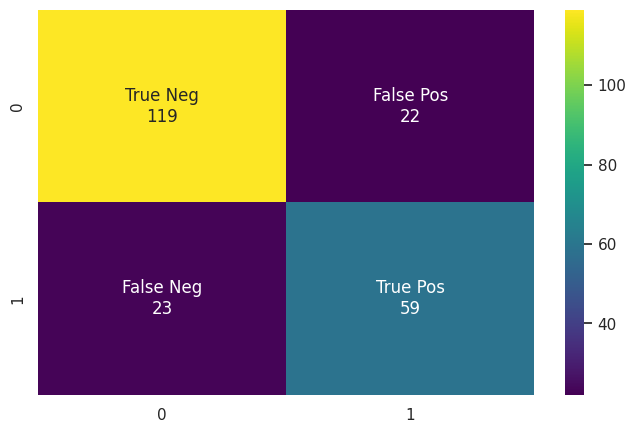

In [62]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_rf.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2, 2)

sns.set(font_scale= 1)
sns.heatmap(cf_matrix_rf, annot=labels, fmt= '', cmap='viridis')

In the case of Random Forest, an improvement was expected in relation to the use of the decision tree, which was noted when training the decision tree with the standard hyperparameters. However, the behaviour of the tree with the best hyperparameters was different from what was expected.